# Emerging Technologies
## Tasks - JupyterNotebook

#### Ryan Harte (G00338424)

---

## Table of Contents

1. [Introduction](#intro)
2. [Methodology](#method)
3. [Results](#results)
4. [Quantum Circuits/Logic Gates](#qiskit)

<a id="intro"></a>
## Introduction
This is the introduction.

<a id="method"></a>
## Methodology
Here we describe the methods.

<a id="results"></a>
## Results
This section contains results.

<a id="qiskit"></a>
## Quantum Circuits/Logic Gates

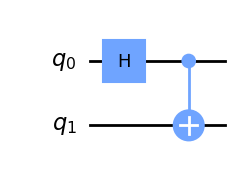

In [48]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate with the first qubit as control and the second as the target
qc.cx(0, 1)

# Draw the circuit
qc.draw('mpl')


Total count for 00 and 11 are: {'00': 512, '11': 488}


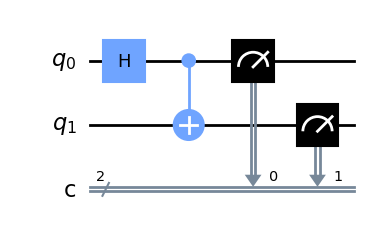

In [49]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

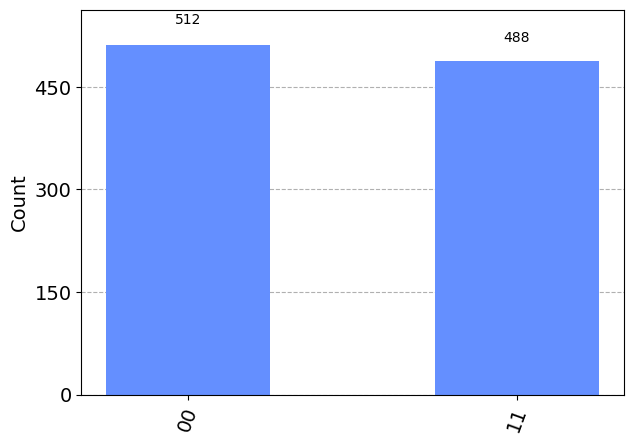

In [50]:
# Plot a histogram
plot_histogram(counts)

In [51]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 494, '00': 506}
